In [15]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import os

In [16]:

# Step 1: Read data from an Excel file
file_path = 'Cleaned_Data.xlsx'
try:
    data = pd.read_excel(file_path)
except FileNotFoundError:
    print("Error: File not found. Check the file name and location.")
    exit()



In [17]:
# Step 2: Define numeric columns
numeric_columns = [
    'Age', 'Income', 'Total Time Spent', 'Number of Sessions',
    'Video Length', 'Engagement', 'Importance Score',
    'Time Spent On Video', 'Number of Videos Watched',
    'Scroll Rate', 'Productivity',
    'Satisfaction', 'Self Control', 'Addiction Level'
]

In [18]:

# Verify numeric columns exist in the dataset
missing_columns = [col for col in numeric_columns if col not in data.columns]
if missing_columns:
    print(f"Error: The following numeric columns are missing in the dataset: {missing_columns}")
    exit()


In [19]:
# Handling missing values
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [20]:
# Step 3: Normalize to range 0-10
def normalize_to_0_10(column):
    min_val = column.min()
    max_val = column.max()
    if max_val == min_val:  # Avoid division by zero
        return column  # Return the column as is
    return 10 * (column - min_val) / (max_val - min_val)

data_normalized_0_10 = data.copy()
data_normalized_0_10[numeric_columns] = data_normalized_0_10[numeric_columns].apply(normalize_to_0_10)



In [21]:
# Step 4: Apply Z-Score Normalization
scaler = StandardScaler()
data_zscore_normalized = data.copy()
data_zscore_normalized[numeric_columns] = scaler.fit_transform(data_zscore_normalized[numeric_columns])

In [22]:
# Display results
print("Normalized Data to Range 0-10:")
print(data_normalized_0_10[numeric_columns].head())

print("\nNormalized Data using Z-Score:")
print(data_zscore_normalized[numeric_columns].head())

Normalized Data to Range 0-10:
        Age    Income  Total Time Spent  Number of Sessions  Video Length  \
0  8.260870  7.879756          2.430556            8.888889      8.214286   
1  6.086957  0.988333          7.569444            7.222222      6.428571   
2  3.043478  2.803440          0.694444            2.777778      6.428571   
3  9.130435  5.384219          3.159722           10.000000      1.071429   
4  1.521739  0.246172          4.375000            2.777778      6.428571   

   Engagement  Importance Score  Time Spent On Video  \
0    7.877997              5.00             8.928571   
1    5.948630              6.25             8.571429   
2    8.687669              2.50             2.857143   
3    2.470151              1.25             1.785714   
4    3.088191              7.50             4.285714   

   Number of Videos Watched  Scroll Rate  Productivity  Satisfaction  \
0                  4.375000     8.775510          2.50          7.50   
1                  6.2500

In [23]:
# Step 5: Save the modified data to a new file
output_file = './ZScore_Normalized_TIME-WASTERS.xlsx'

In [24]:
# Ensure the output directory exists
output_dir = os.path.dirname(output_file)
os.makedirs(output_dir, exist_ok=True)

In [25]:
# Save Normalized Data to Range 0-10
output_file_0_10 = './Normalized_0_10_TIME-WASTERS.xlsx'
data_normalized_0_10.to_excel(output_file_0_10, index=False)
print(f"The normalized data (0-10) has been saved to: {output_file_0_10}")

The normalized data (0-10) has been saved to: ./Normalized_0_10_TIME-WASTERS.xlsx


Normalized Data to Range 0-10 has been saved to  :



[Normalization_0_10](./Normalized_0_10_TIME-WASTERS.xlsx)

In [26]:

# Save Z-Score Normalized Data
output_file_zscore = './ZScore_Normalized_TIME-WASTERS.xlsx'
data_zscore_normalized.to_excel(output_file_zscore, index=False) 
print(f"The Z-Score normalized data has been saved to: {output_file_zscore}")

The Z-Score normalized data has been saved to: ./ZScore_Normalized_TIME-WASTERS.xlsx


The Z-Score normalized data has been saved to

[Zscore Normalization](./ZScore_Normalized_TIME-WASTERS.xlsx)

In [27]:
from IPython.display import display
display(data.head())
display(data_normalized_0_10.head())
display(data_zscore_normalized.head())

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,Productivity,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,21:00:00,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,17:00:00,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,14:00:00,8,2,At home,Mobile Data
3,4,60,Male,Brazil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,21:00:00,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,08:00:00,10,0,At home,Mobile Data


,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,Productivity,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,8.260870,Male,Pakistan,7.879756,True,True,Engineer,Rural,Instagram,...,2.50,7.50,Procrastination,Smartphone,Android,21:00:00,2.857143,7.142857,Commuting,Mobile Data
1,2,6.086957,Female,Mexico,0.988333,False,True,Artist,Urban,Instagram,...,5.00,5.00,Habit,Computer,Android,17:00:00,5.714286,4.285714,At school,Wi-Fi
2,3,3.043478,Female,United States,2.803440,False,True,Engineer,Rural,Facebook,...,6.25,3.75,Entertainment,Tablet,Android,14:00:00,7.142857,2.857143,At home,Mobile Data
3,4,9.130435,Male,Brazil,5.384219,True,False,Waiting staff,Rural,YouTube,...,2.50,7.50,Habit,Smartphone,Android,21:00:00,2.857143,7.142857,Commuting,Mobile Data
4,5,1.521739,Male,Pakistan,0.246172,False,True,Manager,Urban,TikTok,...,8.75,1.25,Boredom,Smartphone,iOS,08:00:00,10.000000,0.000000,At home,Mobile Data


,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,Productivity,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,1.112882,Male,Pakistan,0.981599,True,True,Engineer,Rural,Instagram,...,-1.006976,1.006976,Procrastination,Smartphone,Android,21:00:00,-1.017757,1.017757,Commuting,Mobile Data
1,2,0.371652,Female,Mexico,-1.328813,False,True,Artist,Urban,Instagram,...,-0.064115,0.064115,Habit,Computer,Android,17:00:00,-0.045687,0.045687,At school,Wi-Fi
2,3,-0.666069,Female,United States,-0.720282,False,True,Engineer,Rural,Facebook,...,0.407316,-0.407316,Entertainment,Tablet,Android,14:00:00,0.440348,-0.440348,At home,Mobile Data
3,4,1.409373,Male,Brazil,0.144948,True,False,Waiting staff,Rural,YouTube,...,-1.006976,1.006976,Habit,Smartphone,Android,21:00:00,-1.017757,1.017757,Commuting,Mobile Data
4,5,-1.184929,Male,Pakistan,-1.577629,False,True,Manager,Urban,TikTok,...,1.350177,-1.350177,Boredom,Smartphone,iOS,08:00:00,1.412417,-1.412417,At home,Mobile Data


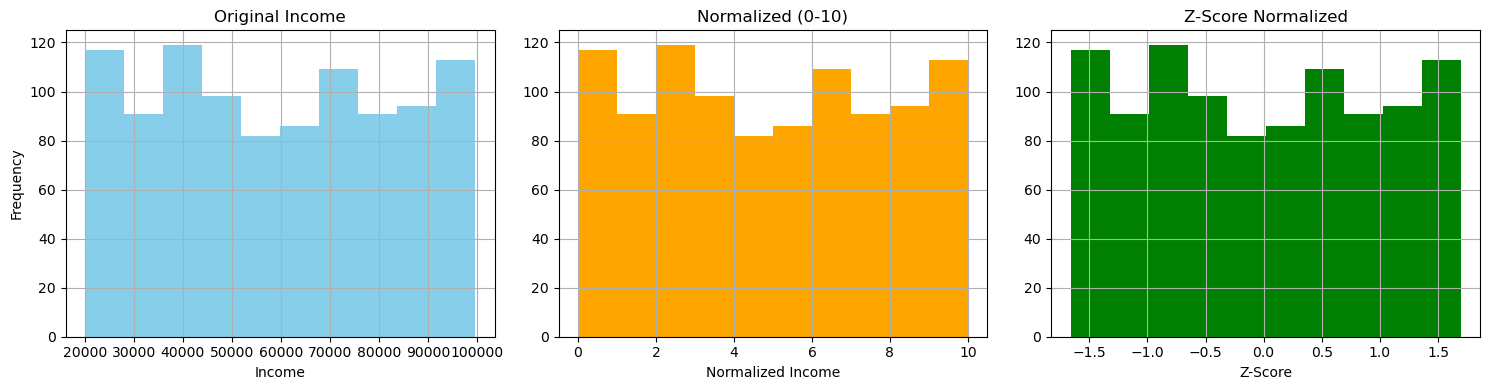

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))

# Original
plt.subplot(1, 3, 1)
data['Income'].hist(color='skyblue')
plt.title('Original Income')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Min-Max Normalized
plt.subplot(1, 3, 2)
data_normalized_0_10['Income'].hist(color='orange')
plt.title('Normalized (0-10)')
plt.xlabel('Normalized Income')

# Z-Score Normalized
plt.subplot(1, 3, 3)
data_zscore_normalized['Income'].hist(color='green')
plt.title('Z-Score Normalized')
plt.xlabel('Z-Score')

plt.tight_layout()
plt.show()

Data Normalization Completed

👉 [Click to open Analysis Story](./Analysis%20Story.ipynb)
